# Joining data enables us to draw information from separate tables together into a single, meaningful set of results

In [1]:
# create database and tables
import sqlite3
import pandas as pd

con = sqlite3.connect("countries.db")
cur = con.cursor()

cur.execute("DROP TABLE IF EXISTS cities")
cities = pd.read_csv("countries/cities.csv", header=0)
cities.to_sql('cities', con, if_exists='append', index = False, index_label='name', chunksize = 10000)

cur.execute("DROP TABLE IF EXISTS countries")
countries = pd.read_csv("countries/countries.csv", header=0)
countries.to_sql('countries', con, if_exists='append', index = False, index_label='code', chunksize = 10000)

cur.execute("DROP TABLE IF EXISTS economies")
economies = pd.read_csv("countries/economies.csv", header=0)
economies.to_sql('economies', con, if_exists='append', index = False, index_label='econ_id', chunksize = 10000)

cur.execute("DROP TABLE IF EXISTS economies2015")
economies2015 = pd.read_csv("countries/economies2015.csv", header=0)
economies2015.to_sql('economies2015', con, if_exists='append', index = False, index_label='econ_id', chunksize = 10000)

cur.execute("DROP TABLE IF EXISTS economies2019")
economies2019 = pd.read_csv("countries/economies2019.csv", header=0)
economies2019.to_sql('economies2019', con, if_exists='append', index = False, index_label='econ_id', chunksize = 10000)

cur.execute("DROP TABLE IF EXISTS languages")
languages = pd.read_csv("countries/languages.csv", header=0)
languages.to_sql('languages', con, if_exists='append', index = False, index_label='lang_id', chunksize = 10000)

cur.execute("DROP TABLE IF EXISTS populations")
populations = pd.read_csv("countries/populations.csv", header=0)
populations.to_sql('populations', con, if_exists='append', index = False, index_label='pop_id', chunksize = 10000)

cur.execute("DROP TABLE IF EXISTS currencies")
currencies = pd.read_csv("countries/currencies.csv", header=0)
currencies.to_sql('currencies', con, if_exists='append', index = False, index_label='pop_id', chunksize = 10000)

cur.execute("DROP TABLE IF EXISTS monarchs")
monarchs = pd.read_csv("leaders/monarchs.csv", header=0)
monarchs.to_sql('monarchs', con, if_exists='append', index = False, index_label='pop_id', chunksize = 10000)

cur.execute("DROP TABLE IF EXISTS prime_ministers")
prime_ministers = pd.read_csv("leaders/prime_ministers.csv", header=0)
prime_ministers.to_sql('prime_ministers', con, if_exists='append', index = False, index_label='pop_id', chunksize = 10000)

con.close()

In [2]:
# connect to database
con = sqlite3.connect("countries.db")
cur = con.cursor()

In [4]:
# Select all columns from cities
pd.read_sql("""SELECT * 
               FROM cities;""",
            con)

,name,country_code,city_proper_pop,metroarea_pop,urbanarea_pop
0,Abidjan,CIV,4765000,NaN,4765000
1,Abu Dhabi,ARE,1145000,NaN,1145000
2,Abuja,NGA,1235880,6000000.0,1235880
3,Accra,GHA,2070463,4010054.0,2070463
4,Addis Ababa,ETH,3103673,4567857.0,3103673
...,...,...,...,...,...
231,Yerevan,ARM,1060138,NaN,1060138
232,Yokohama,JPN,3726167,NaN,3726167
233,Zhengzhou,CHN,4122087,NaN,4122087
234,Zhongshan,CHN,3121275,NaN,3121275


In [77]:
# Inner join to countries
pd.read_sql("""SELECT cities.name AS city, country_name AS country, region
               FROM cities
               INNER JOIN countries
               ON cities.country_code = countries.code;""",
            con)

,city,country,region
0,Abidjan,Cote d'Ivoire,Western Africa
1,Abu Dhabi,United Arab Emirates,Middle East
2,Abuja,Nigeria,Western Africa
3,Accra,Ghana,Western Africa
4,Addis Ababa,Ethiopia,Eastern Africa
...,...,...,...
225,Yerevan,Armenia,Middle East
226,Yokohama,Japan,Eastern Asia
227,Zhengzhou,China,Eastern Asia
228,Zhongshan,China,Eastern Asia


In [78]:
# use data from both the countries and economies tables to examine the inflation rate in 2010 and 2015
pd.read_sql("""SELECT c.code AS country_code, country_name, year, inflation_rate
               FROM countries AS c
               JOIN economies AS e 
               ON c.code = e.code;""",
            con)

,country_code,country_name,year,inflation_rate
0,AFG,Afghanistan,2010,2.179
1,AFG,Afghanistan,2015,-1.549
2,NLD,Netherlands,2010,0.932
3,NLD,Netherlands,2015,0.220
4,ALB,Albania,2010,3.605
...,...,...,...,...
363,EST,Estonia,2015,0.068
364,USA,United States,2010,1.637
365,USA,United States,2015,0.120
366,ZWE,Zimbabwe,2010,3.045


### When both the field names being joined on are the same, you can take advantage of the USING clause

A parting word of caution when using USING: columns can sometimes have the same name but actually contain vastly different data. Always remember to check what you are joining on by displaying and viewing your data first!

In [92]:
# Which languages are official languages, and which ones are unofficial?

pd.read_sql("""SELECT country_name AS country, l.name AS language, official
               FROM countries AS c
               INNER JOIN languages AS l
               USING(code);""",
            con)

,country,language,official
0,Afghanistan,Dari,1
1,Afghanistan,Other,0
2,Afghanistan,Pashto,1
3,Afghanistan,Turkic,0
4,Netherlands,Dutch,1
...,...,...,...
904,Zimbabwe,Tonga,1
905,Zimbabwe,Tswana,1
906,Zimbabwe,Venda,1
907,Zimbabwe,Xhosa,1


In [19]:
# query all the countries that speak each language

pd.read_sql("""SELECT l.name AS language, country_name AS country, l.percent
               FROM languages AS l 
               INNER JOIN countries AS c
               USING(code)
               ORDER BY language;""",
            con)


,language,country,percent
0,Afar,Djibouti,NaN
1,Afar,Eritrea,NaN
2,Afar,Ethiopia,1.70
3,Afrikaans,Namibia,10.40
4,Afrikaans,South Africa,13.50
...,...,...,...
904,unspecified,Poland,1.30
905,unspecified,Rwanda,0.30
906,unspecified,Seychelles,1.40
907,unspecified,Tonga,0.03


### Joining multiple tables

In [4]:
# Find out the relationship between fertility and unemployment rates. 
# join tables to return the country name, year, fertility rate, and unemployment rate in a single result

pd.read_sql("""SELECT country_name, e.year, p.fertility_rate, ROUND(e.unemployment_rate, 1)
               FROM countries AS c
               INNER JOIN populations AS p
               ON c.code = p.country_code
               INNER JOIN economies AS e
               ON c.code = e.code
               AND p.year = e.year
               ;""",
            con)

,country_name,year,fertility_rate,"ROUND(e.unemployment_rate, 1)"
0,Afghanistan,2010,5.746,NaN
1,Afghanistan,2015,4.653,NaN
2,Netherlands,2010,1.790,5.0
3,Netherlands,2015,1.710,6.9
4,Albania,2010,1.663,14.0
...,...,...,...,...
363,Estonia,2015,1.540,6.1
364,United States,2010,1.931,9.6
365,United States,2015,1.843,5.3
366,Zimbabwe,2010,4.048,NaN


# LEFT JOIN 
### will help if you're interested in returning all countries in the cities table, whether or not they have a match in the countries table.

In [17]:
# Find the list of all the cities whether or not they have a match in the countries table

pd.read_sql("""SELECT 
                   c1.name AS city, 
                   country_code, 
                   c2.country_name AS country,
                   region, 
                   city_proper_pop
               FROM cities AS c1
               LEFT JOIN countries AS c2
               ON c1.country_code = c2.code
               ORDER BY country DESC
               ;""",
            con)

,city,country_code,country,region,city_proper_pop
0,Harare,ZWE,Zimbabwe,Eastern Africa,1606000
1,Lusaka,ZMB,Zambia,Eastern Africa,1742979
2,Sana'a,YEM,Yemen,Middle East,1937451
3,Hanoi,VNM,Vietnam,Southeast Asia,6844100
4,Ho Chi Minh City,VNM,Vietnam,Southeast Asia,7681700
...,...,...,...,...,...
231,Kaohsiung,TWN,None,None,2778918
232,New Taipei City,TWN,None,None,3954929
233,Taichung,TWN,None,None,2752413
234,Tainan,TWN,None,None,1885252


In [28]:
# determine the average gross domestic product (GDP) per capita by region in 2010.

pd.read_sql("""SELECT region, ROUND(AVG(gdp_percapita), 2) AS avg_gdp_per_region
               FROM countries AS c
               LEFT JOIN economies AS e
               USING(code)
               WHERE year = 2010
               GROUP BY region, year
               ORDER BY avg_gdp_per_region DESC
               ;""",
            con)

,region,avg_gdp_per_region
0,Western Europe,58130.96
1,Nordic Countries,57074.00
2,North America,47911.51
3,Australia and New Zealand,44792.39
4,British Islands,43588.33
5,Eastern Asia,24962.81
6,Southern Europe,22926.41
7,Middle East,18204.64
8,Baltic Countries,12631.03
9,Caribbean,11413.34


# FULL JOIN

In [39]:
# example on how full join works

pd.read_sql("""SELECT country_name AS country, code, region, basic_unit
               FROM countries
               FULL JOIN currencies
               USING (code)
               WHERE region = 'North America' OR country IS NULL
               ORDER BY country DESC
               ;""",
            con)

,country,code,region,basic_unit
0,United States,USA,North America,United States dollar
1,Greenland,GRL,North America,None
2,Canada,CAN,North America,Canadian dollar
3,Bermuda,BMU,North America,Bermudian dollar
4,None,AIA,None,East Caribbean dollar
5,None,IOT,None,United States dollar
6,None,CCK,None,Australian dollar
7,None,COK,None,New Zealand dollar
8,None,TMP,None,United States dollar
9,None,FLK,None,Falkland Islands pound


In [51]:
# do some research on Melanesia and Micronesia, 
# pull information about languages into the data from the countries table.

pd.read_sql("""SELECT 
                   c1.country_name AS country, 
                   region, 
                   l.name AS language
               FROM countries AS c1 
               FULL JOIN languages AS l
               USING(code)
               WHERE region LIKE 'M%esia'
               ;""",
            con)



,country,region,language
0,Fiji Islands,Melanesia,None
1,Guam,Micronesia,English
2,Guam,Micronesia,Filipino
3,Guam,Micronesia,Chamorro
4,Guam,Micronesia,Other Pacific Islander
5,Guam,Micronesia,Asian
6,Guam,Micronesia,Other
7,Kiribati,Micronesia,Kiribati
8,Kiribati,Micronesia,English
9,Marshall Islands,Micronesia,Marshallese


In [49]:
# do some research on Melanesia and Micronesia, 
# pull information about currencies into the data from the countries table.

pd.read_sql("""SELECT 
                   c1.country_name AS country, 
                   region, 
                   basic_unit, 
                   frac_unit,
                   COUNT(l.name) AS lang_qty
               FROM countries AS c1 
               FULL JOIN currencies AS c2
               USING(code)
               FULL JOIN languages AS l
               USING(code)
               WHERE region LIKE 'M%esia'
               GROUP BY country
               ORDER BY lang_qty DESC
               ;""",
            con)


,country,region,basic_unit,frac_unit,lang_qty
0,"Micronesia, Federated States of",Micronesia,None,None,9
1,Northern Mariana Islands,Micronesia,None,None,7
2,Palau,Micronesia,United States dollar,Cent,6
3,Guam,Micronesia,None,None,6
4,Vanuatu,Melanesia,Vanuatu vatu,None,5
5,Papua New Guinea,Melanesia,Papua New Guinean kina,Toea,4
6,Solomon Islands,Melanesia,Solomon Islands dollar,Cent,3
7,Nauru,Micronesia,Australian dollar,Cent,3
8,New Caledonia,Melanesia,CFP franc,Centime,2
9,Marshall Islands,Micronesia,United States dollar,Cent,2


# CROSS JOIN 
### can be incredibly helpful when asking questions that involve looking at all possible combinations or pairings between two sets of data

In [75]:
# What are the languages presently spoken in Pakistan and India?
# Given the shared history between the two countries, 
# what languages could potentially have been spoken in either country over the course of their history?

pd.read_sql("""SELECT c.country_name AS country,  l.name AS language
               FROM countries AS c
               CROSS JOIN languages AS l
               WHERE c.code IN ('PAK','IND')
                   AND l.code in ('PAK','IND')
               ORDER BY language
               ;""",
            con)

# !!! 
# Notice that this returns duplicate records in cases where both countries speak the same language. 

,country,language
0,India,Assamese
1,Pakistan,Assamese
2,India,Balochi
3,Pakistan,Balochi
4,India,Bengali
5,Pakistan,Bengali
6,India,Brahui
7,Pakistan,Brahui
8,India,Burushaski
9,Pakistan,Burushaski


In [64]:
# A challenge problem!

# determine the names of the five countries and their respective regions 
# with the lowest life expectancy for the year 2010

pd.read_sql("""SELECT c.country_name AS country, c.region, ROUND(p.life_expectancy, 1) AS life_exp
               FROM countries AS c
               JOIN populations AS p
               ON c.code = p.country_code
               WHERE p.year = 2010 
                   AND life_expectancy IS NOT NULL
               ORDER BY life_expectancy ASC
               LIMIT 5
               ;""",
            con)


,country,region,life_exp
0,Lesotho,Southern Africa,47.5
1,Central African Republic,Central Africa,47.6
2,Sierra Leone,Western Africa,48.2
3,Swaziland,Southern Africa,48.3
4,Zimbabwe,Eastern Africa,49.6


# SELF JOIN

In [109]:
# find out how much the populations for each country changed from 2010 to 2015

pd.read_sql("""SELECT 
                   c.country_name AS country,
                   p1.country_code, 
                   ROUND(p1.size/1000000, 2) AS size2010_millions, 
                   ROUND(p2.size/1000000, 2) AS size2015_millions,
                   ROUND((p2.size - p1.size)/1000, 1) AS growth_in_thousands
               FROM populations AS p1
               INNER JOIN populations AS p2
               ON p1.country_code = p2.country_code
               FULL JOIN countries AS c
               ON p1.country_code = c.code
               WHERE p1.year = 2010
                   AND p2.year = 2015
               ORDER BY growth_in_thousands DESC
               ;""",
            con)


,country,country_code,size2010_millions,size2015_millions,growth_in_thousands
0,India,IND,1230.98,1311.05,80066.0
1,China,CHN,1337.71,1371.22,33515.0
2,Nigeria,NGA,159.42,182.20,22777.2
3,Pakistan,PAK,170.04,188.92,18881.0
4,Indonesia,IDN,241.61,257.56,15950.7
...,...,...,...,...,...
212,None,ROU,20.25,19.82,-431.6
213,Ukraine,UKR,45.87,45.15,-716.7
214,Japan,JPN,128.07,126.96,-1111.5
215,Syria,SYR,20.72,18.50,-2218.2


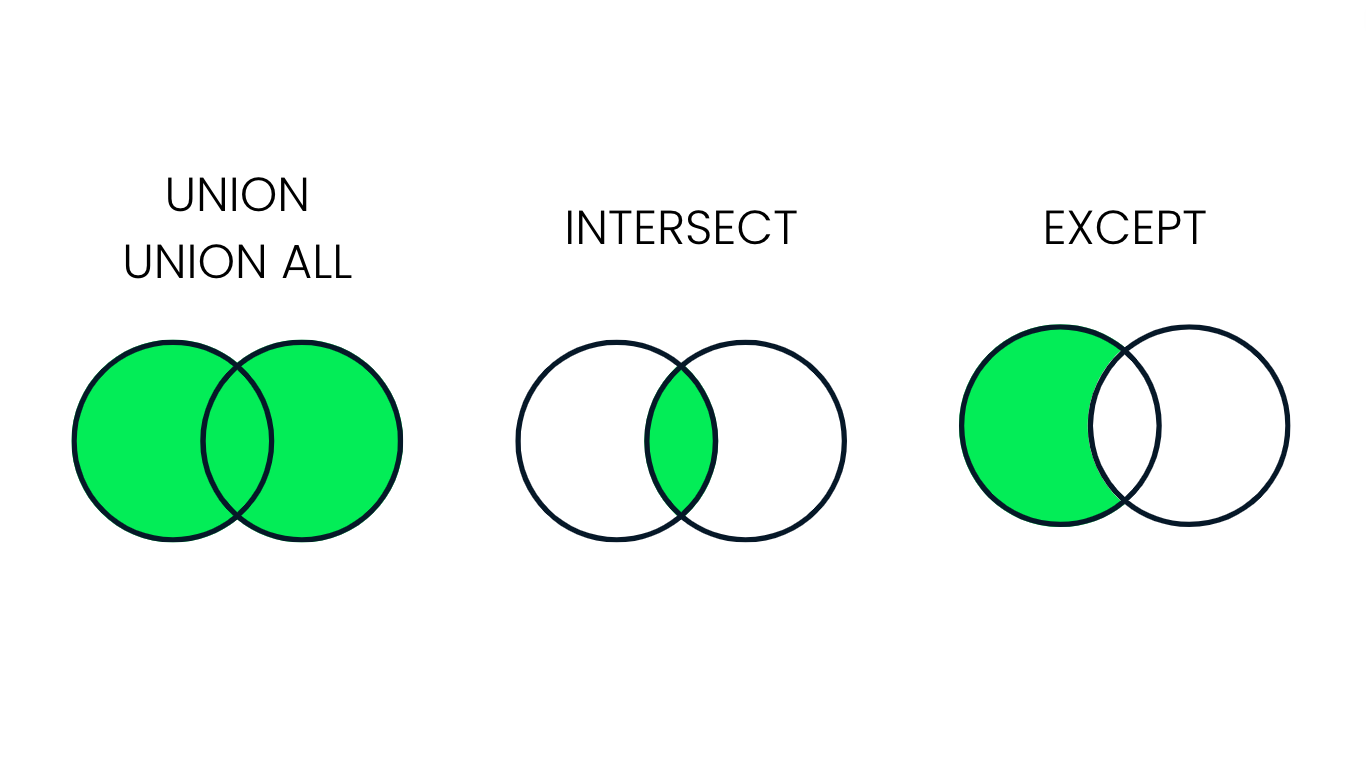

# Set operations: UNION and UNION ALL

- Number of columns in tables must be equal
- Their respective data types must be identical
- The result uses only field names of the first SELECT statement
- UNION ALL shows all the data from both tables whereas UNION removes duplicates

In [6]:
# perform a set operation to stack all records 
# in economies2015 and economies2019 tables on top of each other,
# excluding duplicates.

pd.read_sql("""SELECT * 
               FROM economies2015    
               UNION
               SELECT * 
               FROM economies2019
               ORDER BY code, year
               ;""",
            con)

,code,year,income_group,gross_savings
0,ABW,2015,High income,14.867852
1,AGO,2015,Lower middle income,25.021327
2,AGO,2019,Lower middle income,25.524848
3,ALB,2015,Upper middle income,16.863981
4,ALB,2019,Upper middle income,14.499826
...,...,...,...,...
312,ZAF,2019,Upper middle income,13.465737
313,ZMB,2015,Lower middle income,33.700215
314,ZMB,2019,Lower middle income,39.714393
315,ZWE,2015,Lower middle income,-0.107826


# Set operations: INTERSECT

INTERSECT is a robust set operation for finding the set of identical records between two sets of records.

- returns only the records that exist in both tables

In [9]:
# Return all cities with the same name as a country

pd.read_sql("""SELECT name 
               FROM cities 
               INTERSECT
               SELECT country_name
               FROM countries
               ;""",
            con)


,name
0,Singapore


# Set operations: EXCEPT

- returns the records that are present only in one table (in the left one) and are not present in the second table (the right one)

In [14]:
# find all monarchs that do NOT also hold the title of prime_minister

pd.read_sql("""SELECT monarch AS leader, country
               FROM monarchs 
               EXCEPT
               SELECT prime_minister, country
               FROM prime_ministers
               ;""",
            con)


,leader,country
0,Harald V,Norway
1,Queen Elizabeth II,United Kingdom


# Subqueries
### Subqueries inside WHERE can either be from the same table or a different table

In [86]:
# you are interested in identifying languages spoken in the Middle East. 
# The languages table contains information about languages and countries, 
# but it does not tell you what region the countries belong to. 
# You can build up a semi join by filtering the countries table by a particular region, 
#and then using this to further filter the languages table.

pd.read_sql("""SELECT DISTINCT name AS language
               FROM languages
               WHERE code IN
                   (SELECT code from countries
                    WHERE region = "Middle East")
               ORDER BY language
               ;""",
            con)


,language
0,Arabic
1,Aramaic
2,Armenian
3,Azerbaijani
4,Azeri
5,Baluchi
6,Bulgarian
7,Circassian
8,English
9,Farsi


In [44]:
# you are interested in identifying currencies of Oceanian countries. 
# You have written the INNER JOIN, which returns 15 records. 
# Now, you want to ensure that all Oceanian countries from the countries table are included in this result

pd.read_sql("""SELECT code, country_name
               FROM countries
               WHERE continent = 'Oceania'
               AND code NOT IN
                   (SELECT code
                   FROM currencies)
               ;""",
            con)


# Your anti join determined which five out of 19 countries have no information about currency.

,code,country_name
0,ASM,American Samoa
1,FJI,Fiji Islands
2,GUM,Guam
3,FSM,"Micronesia, Federated States of"
4,MNP,Northern Mariana Islands


In [68]:
# figure out which countries had high average life expectancies in 2015


pd.read_sql("""SELECT 
                    (SELECT country_name 
                    FROM countries
                    WHERE populations.country_code = countries.code) AS country,
                    ROUND(life_expectancy, 1) AS life_expectancy
               FROM populations
               WHERE life_expectancy > 1.15 *
                  (SELECT AVG(life_expectancy)
                   FROM populations
                   WHERE year = 2015) 
                    AND year = 2015
                ORDER BY life_expectancy DESC
               ;""",
            con)

,country,life_expectancy
0,None,84.3
1,Japan,83.8
2,Italy,83.5
3,Spain,83.4
4,Switzerland,83.2
5,Iceland,82.9
6,France,82.7
7,Singapore,82.6
8,Sweden,82.6
9,Australia,82.5


In [79]:
# strengthen your knowledge of subquerying by identifying capital cities in order of largest to smallest population.

pd.read_sql("""SELECT name, country_code, ROUND(urbanarea_pop/1000000.0, 2) AS population_in_millions
               FROM cities
               WHERE name IN
                   (SELECT capital
                   FROM countries)
               ORDER BY urbanarea_pop DESC
               ;""",
            con)

,name,country_code,population_in_millions
0,Beijing,CHN,21.52
1,Dhaka,BGD,14.54
2,Tokyo,JPN,13.51
3,Moscow,RUS,12.20
4,Cairo,EGY,10.23
...,...,...,...
61,Dakar,SEN,1.15
62,Abu Dhabi,ARE,1.15
63,Tripoli,LBY,1.13
64,Yerevan,ARM,1.06


# Subqueries can provide an alternative to joins to obtain the same result
### In Step 1, begin with a LEFT JOIN combined with a GROUP BY to select the nine countries with the most cities appearing in the cities table, along with the counts of these cities. 

In [82]:
pd.read_sql("""SELECT countries.country_name AS country, COUNT(*) AS cities_num
               FROM countries
               LEFT JOIN cities
               ON countries.code = cities.country_code
               GROUP BY country
               ORDER BY cities_num DESC, country
               LIMIT 9
               ;""",
            con)

,country,cities_num
0,China,36
1,India,18
2,Japan,11
3,Brazil,10
4,Pakistan,9
5,United States,9
6,Indonesia,7
7,Russian Federation,7
8,South Korea,7


### In Step 2,  write a query that returns the same result as the join, but leveraging a nested query instead.

In [84]:
# Notice how the subquery involves only one additional step in your SELECT statement, 
# whereas the JOIN and GROUP BY are a two-step process.

pd.read_sql("""SELECT countries.country_name AS country, 
                 (SELECT COUNT(*)
                  FROM cities
                  WHERE countries.code = cities.country_code) AS cities_num
               FROM countries
               ORDER BY cities_num DESC, country
               LIMIT 9
               ;""",
            con)

,country,cities_num
0,China,36
1,India,18
2,Japan,11
3,Brazil,10
4,Pakistan,9
5,United States,9
6,Indonesia,7
7,Russian Federation,7
8,South Korea,7


# Subquery inside FROM
Subqueries inside FROM can help select columns from multiple tables in a single query.



In [24]:
# you are interested in determining the number of languages spoken for each country. 
#You want to present this information alongside each country's local_name, 
#which is a field only present in the countries table and not in the languages table


pd.read_sql("""SELECT country_name AS country, local_name, continent, sub.lang_num
               FROM countries,
                 (SELECT code, COUNT(name) AS lang_num
                  FROM languages
                  GROUP BY code) AS sub
               WHERE countries.code = sub.code
               ORDER BY lang_num DESC
               ;""",
            con)


,country,local_name,continent,lang_num
0,Zambia,Zambia,Africa,19
1,Ethiopia,YeItyop´iya,Africa,16
2,Zimbabwe,Zimbabwe,Africa,16
3,India,Bharat/India,Asia,14
4,Nepal,Nepal,Asia,14
...,...,...,...,...
193,Saudi Arabia,Al-´Arabiya as-Sa´udiya,Asia,1
194,San Marino,San Marino,Europe,1
195,Sweden,Sverige,Europe,1
196,Turks and Caicos Islands,The Turks and Caicos Islands,North America,1


# Subquery challenge
